In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr, stats
import sklearn.preprocessing

import env
import wrangle as w
import explore as e

In [3]:
# cleaning data
df = w.get_data()


In [4]:
df = w.clean_zillow()

378 outliers removed from area_sqft.
67 outliers removed from bathrooms.
85 outliers removed from bedroom.
42 outliers removed from garage.
0 outliers removed from pool.
0 outliers removed from year.
473 outliers removed from property_value.
0 outliers removed from full_bath.

Total of 1045 outliers removed.


In [14]:
df[["garage", "pool"]].value_counts()

garage  pool
0.0     0.0     27252
2.0     0.0     11268
0.0     1.0      6448
2.0     1.0      3377
1.0     0.0      1956
3.0     1.0       285
        0.0       270
1.0     1.0       238
4.0     1.0       100
        0.0        81
dtype: int64

In [15]:
# splitting data
train, validate, test = w.split_data(df)

In [129]:
r, p_value = spearmanr(train.bedroom, train.property_value)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

NameError: name 'personr' is not defined

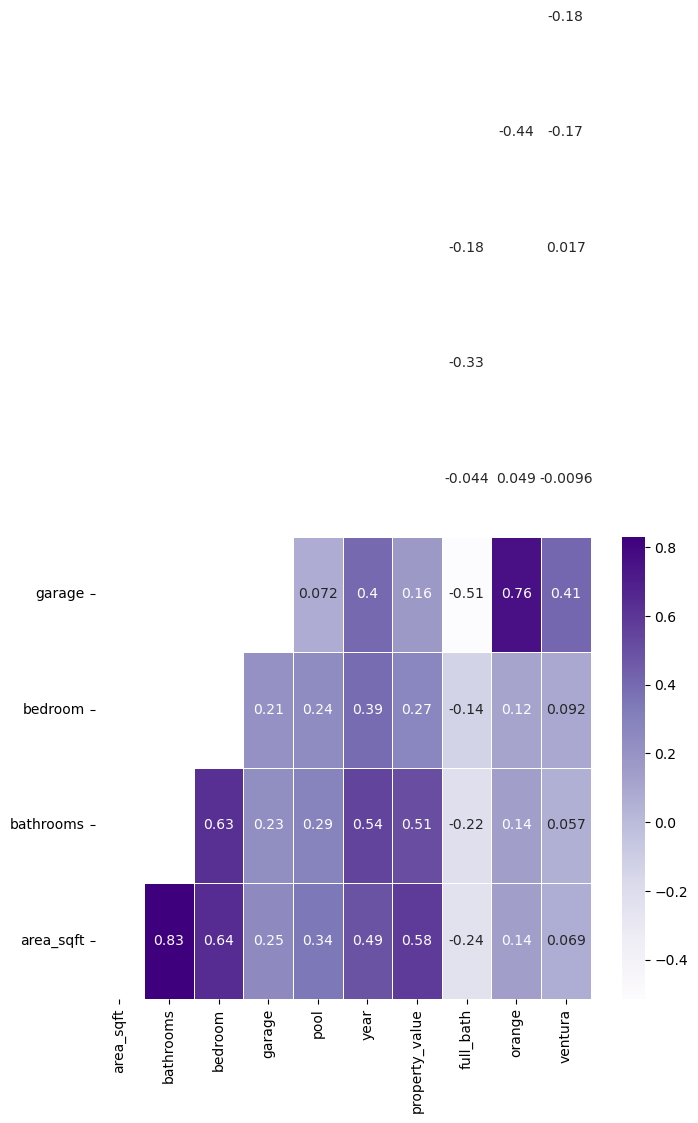

In [50]:
train_corr = train.corr()
plt.figure(figsize=(8,6))
sns.heatmap(train_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.tril(train_corr))
plt.ylim(0, 4)

plt.show()

In [ ]:
e.plot_variable_pairs(df)

## Question: Is having 1 bathroom worse for property value than having 2 bedrooms?

* $H_0$: mean of property value for 1 bathroom homes <= mean of property value for 2 bedroom homes
* $H_a$: mean of property value for 1 bathroom homes > mean of property value for 2 bedroom homes

In [17]:
alpha = 0.05

In [18]:
avg_one_bath =  train[train.bathrooms == 1].property_value
avg_two_bed = train[train.bedroom == 2].property_value

<AxesSubplot:>

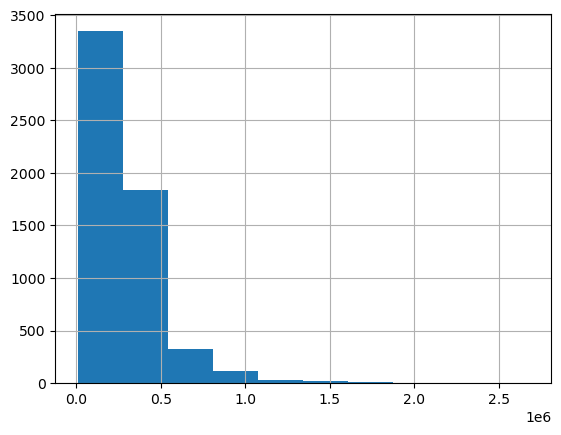

In [19]:
avg_one_bath.hist()

<AxesSubplot:>

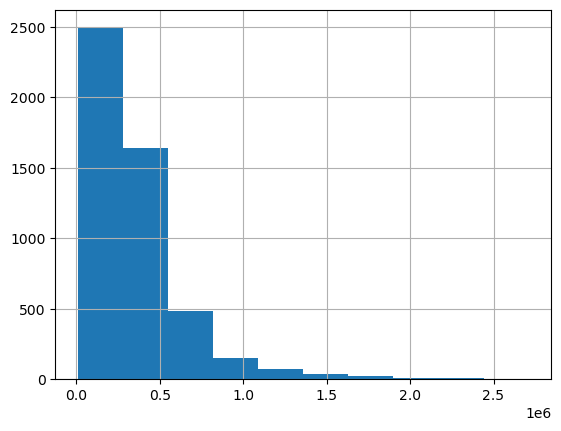

In [20]:
avg_two_bed.hist()

In [21]:
# variances not equal 
print(avg_one_bath.var(), avg_two_bed.var())

59181843902.028366 90223883580.58978


In [22]:
t, p = stats.ttest_ind(avg_one_bath, avg_two_bed, equal_var=False)
t, p / 2


(-12.217233055190912, 2.2713496814723787e-34)

In [23]:
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


In [24]:
# We failed the reject the null hypothesis, having 1 bathroom is worse for property value than having 2 bedrooms.

## Question: Does having a half bath better for property value than a full bath ?

* $H_0$: mean of property value for homes that have half bathrooms <= mean of property value for homes with full bathrooms
* $H_a$: mean of property value for homes that have half bathrooms > mean of property value for homes with full bathrooms

<AxesSubplot:>

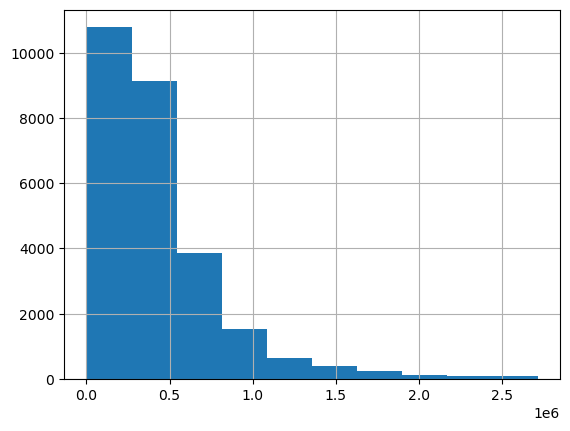

In [130]:
avg_full_bath.hist()

<AxesSubplot:>

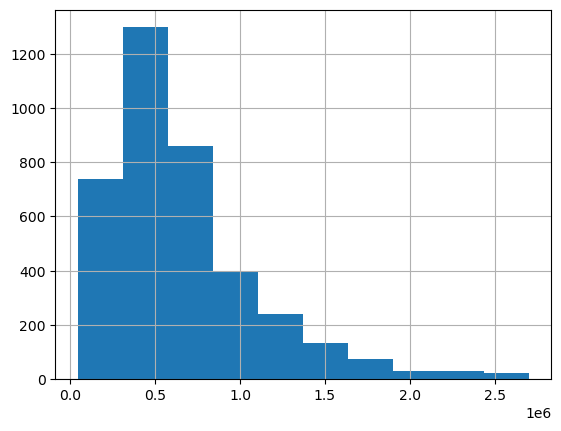

In [131]:
avg_half_bath.hist()

In [25]:
avg_full_bath  = train[train.full_bath == 1].property_value
avg_half_bath = train[train.full_bath == 0].property_value

In [26]:
# variances not equal 
print(avg_full_bath.var(), avg_half_bath.var())

148433626969.1972 201249011931.16794


In [27]:
t, p = stats.ttest_ind(avg_half_bath, avg_full_bath, equal_var=False)
t, p / 2

(28.889102858156125, 2.9398003536872903e-169)

In [28]:
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


In [29]:
# We rejected the null hypothesis and homes that have half bathrooms have a greater property value than homes with only full bathrooms 

## Question: Does having only pool and no garage increase property value more than properties with more than 3 garages but no pool?

* $H_0$: Mean of property value for homes with only a pool and no garage <= mean of property value of homes with more than 2 garages but no pool
* $H_a$: Mean of property value for homes with only a pool and no garage > mean of property value of homes with more than 2 garages but no pool

In [102]:
only_pool = (train["garage"] == 0) & (train["pool"] == 1)

In [109]:
only_pool = train[just_pool].property_value

In [122]:
only_garage = (train["garage"] >= 2 ) & (train["pool"] == 0)
only_garage = train[only_garage].property_value

<AxesSubplot:>

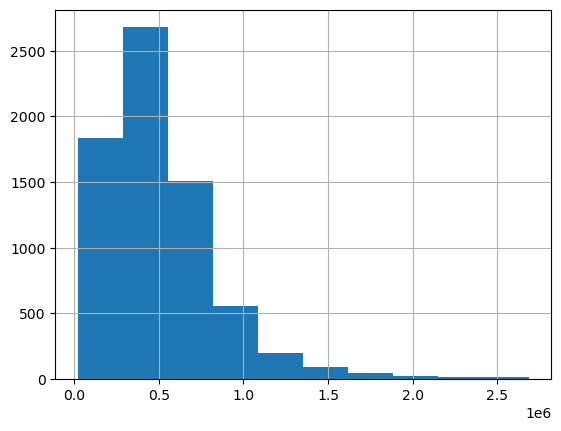

In [123]:
only_garage.hist()

<AxesSubplot:>

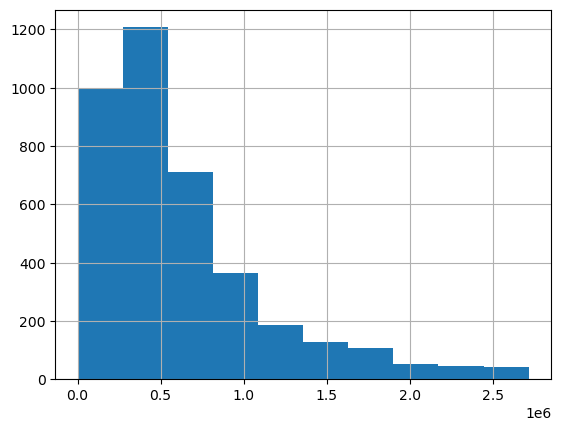

In [124]:
only_pool.hist()

In [125]:
# variances not equal 
print(only_pool.var(), only_garage.var())

262023224063.49765 120672470489.92517


In [126]:
t, p = stats.ttest_ind(only_pool, only_garage, equal_var=False)
t, p / 2

(12.684664717571275, 1.0852356481927861e-36)

In [127]:
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


In [128]:
# We reject the null hypothesis homes with only a pool and no garage is greater than homes with 2 or more garages but no pool

## Question: Does area_sqft  affect property value ?

In [ ]:
* $H_0$: There is no linear correlation between the area_sqft and property value.
* $H_a$: There is a linear correlation between the area_sqft and property value.

In [49]:
corr, p = stats.pearsonr(train.area_sqft, train.property_value)
corr, p

(0.5791828726455707, 0.0)

## Question: is the average area_sqft for properties in orange county greater than the over average area_sqft?

* $H_0$: Mean of property value for homes in orange county <= mean of property value or homes in other counties
* $H_a$: Mean of property value for homes in orange county > mean of property value or homes in other counties

In [41]:
orange_sample = train[train.fips == 'Orange'].property_value
overall_mean = train.property_value.mean()

In [44]:
t4, p4 = stats.ttest_1samp(orange_sample, overall_mean)

In [45]:
orange_sample

43233     216865.0
33463     488909.0
47970     455490.0
42971     611782.0
42229     742429.0
           ...    
14803      82012.0
46601     474784.0
42443    1311462.0
47552     665853.0
20758     706784.0
Name: property_value, Length: 8234, dtype: float64

In [46]:
if p4/2 > alpha:
    print("We fail to reject Null Hypothesis")
elif t4 < 0:
    print("We fail to reject Hypothesis")
else:
    print("We reject Hypothesis")


We reject Hypothesis


In [ ]:
# The null hypothesis is rejected homes in orange county have a higher property value than homes in other counties